<a href="https://colab.research.google.com/github/MathRunner7/github_1/blob/main/Agriculture_Case_Study_with_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Date Fruit Varieties with Support Vector Machines

### Context

Welcome to the **Scaler Agricultural Analytics** team! Our objective is to leverage advanced machine learning techniques to predict the variety of date fruits, empowering farmers and agricultural stakeholders to improve classification accuracy and streamline post-harvest processes. Your role is to analyze various morphological, colorimetric, and textural attributes of date fruits to build predictive models that distinguish different varieties effectively.

### Dataset Description

You have been provided with a comprehensive dataset containing morphological and colorimetric features of different varieties of date fruits. The dataset includes the following attributes:

### Morphological Attributes:
- **AREA:** Surface area of the date fruit.
- **PERIMETER:** Perimeter measurement around the fruit.
- **MAJOR_AXIS:** Length of the major axis of the date fruit.
- **MINOR_AXIS:** Length of the minor axis of the date fruit.
- **ECCENTRICITY:** Ratio describing the shape of the fruit based on the axes.
- **EQDIASQ:** Equivalent diameter of a circle with the same area as the fruit.
- **SOLIDITY:** Ratio of the area to the convex hull area.
- **CONVEX_AREA:** Area of the smallest convex polygon that can contain the fruit.
- **EXTENT:** Ratio of the area to the bounding box area.
- **ASPECT_RATIO:** Ratio of the major axis to the minor axis.
- **ROUNDNESS:** Measure of how circular the fruit is.
- **COMPACTNESS:** Measure of how compact or dense the fruit is.

### Shape Factor Attributes:
- **SHAPEFACTOR_1:** Ratio of the perimeter squared to 4π times the area.
- **SHAPEFACTOR_2:** Ratio of 4π times the area to the perimeter squared.
- **SHAPEFACTOR_3:** Ratio of the major axis to the equivalent diameter.
- **SHAPEFACTOR_4:** Ratio of the minor axis to the equivalent diameter.

### Colorimetric Attributes:
- **MeanRR:** Mean intensity of the red color channel.
- **MeanRG:** Mean intensity of the green color channel.
- **MeanRB:** Mean intensity of the blue color channel.
- **StdDevRR:** Standard deviation of the red color channel.
- **StdDevRG:** Standard deviation of the green color channel.
- **StdDevRB:** Standard deviation of the blue color channel.
- **SkewRR:** Skewness of the red color channel.
- **SkewRG:** Skewness of the green color channel.
- **SkewRB:** Skewness of the blue color channel.
- **KurtosisRR:** Kurtosis of the red color channel.
- **KurtosisRG:** Kurtosis of the green color channel.
- **KurtosisRB:** Kurtosis of the blue color channel.
- **EntropyRR:** Entropy of the red color channel.
- **EntropyRG:** Entropy of the green color channel.
- **EntropyRB:** Entropy of the blue color channel.

### Daubechies Wavelet Attributes:
- **ALLdaub4RR:** Wavelet-transformed feature of the red color channel.
- **ALLdaub4RG:** Wavelet-transformed feature of the green color channel.
- **ALLdaub4RB:** Wavelet-transformed feature of the blue color channel.

### Target Attribute:
- **Class:** The variety or class of the date fruit.
- Check this [Date Fruit Vlog](https://www.liveeatlearn.com/types-of-dates/) to see the images of these dates

Your task is to utilize Support Vector Machines (SVMs) to predict the "Class" of each date fruit and identify the most influential features contributing to accurate classification. This project will help streamline the sorting and grading processes in the agricultural industry, offering practical insights to farmers and other stakeholders.



In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/671/original/Date_Fruit_Datasets.zip

--2024-12-04 10:42:50--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/671/original/Date_Fruit_Datasets.zip
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 65.8.234.36, 65.8.234.72, 65.8.234.131, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|65.8.234.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 416324 (407K) [application/zip]
Saving to: ‘Date_Fruit_Datasets.zip.3’

Date_Fruit_Datasets 100%[===================>] 406.57K  --.-KB/s    in 0.06s   

2024-12-04 10:42:50 (6.67 MB/s) - ‘Date_Fruit_Datasets.zip.3’ saved [416324/416324]



In [ ]:
!unzip /content/Date_Fruit_Datasets.zip

Archive:  /content/Date_Fruit_Datasets.zip
replace Date_Fruit_Datasets/Date_Fruit_Datasets.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Date_Fruit_Datasets/Date_Fruit_Datasets.arff  
replace Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx  
replace Date_Fruit_Datasets/Date_Fruit_Datasets_Citation_Request.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Date_Fruit_Datasets/Date_Fruit_Datasets_Citation_Request.txt  


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
import pandas as pd

df = pd.read_excel('/content/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')

In [ ]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [ ]:
class_counts = df.Class.value_counts()
classes = list(class_counts.index)
n_classes = len(classes)
print(f"we've got {n_classes} classes\n")
display(class_counts)

we've got 7 classes



,count
Class,
DOKOL,204
SAFAVI,199
ROTANA,166
DEGLET,98
SOGAY,94
IRAQI,72
BERHI,65




---

# Assesment SVM


### Feature Correlation Analysis

#### Context:
Support Vector Machines (SVM) are sensitive to highly correlated features, especially when using linear kernels. Such correlations can negatively affect the model’s generalization ability and potentially lead to overfitting.

#### Task:
Calculate the Pearson correlation coefficients among 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', and 'COMPACTNESS'. These insights will help in understanding the interdependencies among features that are critical to SVM performance.

#### Instructions:
1. **Calculate Correlation Matrix:** Use the dataset to calculate the Pearson correlation matrix for the specified features.
2. **Visualize Correlation Matrix:** Create a heatmap to visualize the correlations between features, which will help identify which pairs are most correlated.

#### Question:
Based on the heatmap, which pair of features shows the highest correlation? Discuss the potential impact of this correlation on SVM classification and suggest how to mitigate negative effects.

#### Options:
A) 'PERIMETER' and 'MAJOR_AXIS'  
B) 'MAJOR_AXIS' and 'MINOR_AXIS'  
C) 'MINOR_AXIS' and 'COMPACTNESS'  
D) 'PERIMETER' and 'COMPACTNESS'



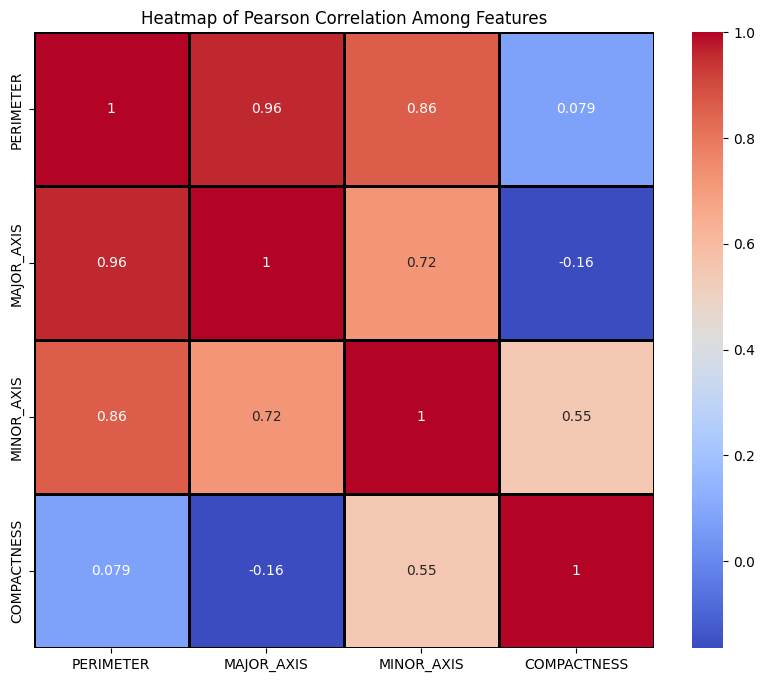

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to include in the correlation matrix
features = ['PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'COMPACTNESS']
# TODO: Compute the correlation matrix for the selected features
correlation_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
# TODO: Fill in the appropriate variable to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2, linecolor='black')
plt.title('Heatmap of Pearson Correlation Among Features')
plt.show()

**Learning Point:**
Support Vector Machines (SVM) are sensitive to highly correlated features, particularly with linear kernels. This sensitivity can lead to overfitting and reduced model generalization.

**Feature Correlation Impact:**
* Highly correlated features (e.g., ‘PERIMETER’ and ‘MAJOR_AXIS’) provide redundant information, affecting the SVM’s ability to separate classes effectively.
* Mitigation Strategies:
Feature Selection: Remove one feature from each correlated pair.
Dimensionality Reduction: Use PCA to transform features into uncorrelated components.
* Regularization: Apply L1 (Lasso) or L2 (Ridge) regularization to reduce redundancy.



---

### Evaluating SVM Precision with Feature Scaling

#### Context:
Support Vector Machine (SVM) is sensitive to the scale of the data, which can significantly impact its performance. This question aims to explore the effect of feature scaling on SVM classification accuracy and precision for each class.

#### Task:
After applying feature scaling, identify the class with the lowest precision in an SVM classification task. The SVM model uses a linear kernel.

#### Instructions:
1. **Prepare Data:**
   - Split the dataset into training and test sets using `train_test_split` with `test_size=0.3` and `random_state=42`.
   - Extract features (`X`) and the target variable (`y`) from the dataset.

2. **Feature Scaling:**
   - Scale the features using `StandardScaler`.

3. **Train SVM:**
   - Train a Support Vector Machine with a linear kernel on the scaled training data.

4. **Evaluate the Model:**
   - Predict the target variable on the scaled test set.
   - Generate a classification report to review the precision scores for each class.


#### Question:
After training an SVM with a linear kernel on scaled data, which class in the classification report exhibits the lowest precision?

#### Options:
(A) SAFAVI

(B) IRAQI

(C) ROTANA

(D) DEGLET


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # TODO: Import the SVC (Support Vector Classifier) from sklearn.svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Preparing the feature and target variables
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the SVM model
svm = SVC(kernel='linear')  # TODO: Specify the kernel type for the SVC model

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # TODO: Apply the scaling to the training features
X_test_scaled = scaler.transform(X_test)  # TODO: Apply the scaling to the test features
'''
# Training the SVM model
svm.fit(X_train, y_train)
predictions_unscaled = svm.predict(X_test)  # TODO: Use the model to predict the test set

print("Without Scaling:")
print(classification_report(y_test, predictions_unscaled))  # TODO: Provide the true and predicted values to generate the classification report
'''
# Training the SVM model
svm.fit(X_train_scaled, y_train)
predictions_scaled = svm.predict(X_test_scaled)  # TODO: Use the model to predict the test set

print("With Scaling:")
print(classification_report(y_test, predictions_scaled))  # TODO: Provide the true and predicted values to generate the classification report

With Scaling:
              precision    recall  f1-score   support

       BERHI       0.89      0.94      0.91        17
      DEGLET       0.73      0.79      0.76        28
       DOKOL       0.97      0.96      0.96        67
       IRAQI       0.87      0.95      0.91        21
      ROTANA       1.00      0.85      0.92        55
      SAFAVI       0.98      0.98      0.98        51
       SOGAY       0.74      0.84      0.79        31

    accuracy                           0.91       270
   macro avg       0.88      0.90      0.89       270
weighted avg       0.91      0.91      0.91       270



This question highlights the importance of feature scaling in SVM performance and introduces students to evaluating model precision across different classes, allowing them to understand the implications of model tuning and data preprocessing in classification accuracy.



---

### Optimal Feature Count for Highest Precision

#### Context:
Feature selection is crucial in machine learning to reduce dimensionality and improve model performance. This exercise involves using Recursive Feature Elimination (RFE) with a Support Vector Machine (SVM) to identify the optimal number of features that yield the highest precision.

#### Task:
Analyze the effect of different numbers of features on the precision of an SVM model trained with these features. Identify the number of features that leads to the highest precision.

#### Instructions:
1. **Data Preparation:**
   - Load the dataset and separate it into features (`X`) and the target variable (`y`).
   - Standardize the features to improve model training.

2. **Feature Selection and Model Training:**
   - Implement Recursive Feature Elimination (RFE) with an SVM classifier to select varying numbers of features.
   - Train an SVM model using these selected features.
   - Use `StratifiedKFold` for cross-validation to ensure the model is robust and generalizable.

3. **Evaluation:**
   - Calculate cross-validated precision for the model with different numbers of selected features.
   - Record and plot precision against the number of features.

4. **Analysis:**
   - Identify the number of features for which the precision is maximized.


#### Question:
Based on the evaluation, what is the number of features required to achieve the highest precision with the SVM model?

#### Options:
(A) 5 features  
(B) 8 features  
(C) 16 features  
(D) 18 features  


Note: Read about [Recursive feature elimination ](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) here to learn more about how it works.

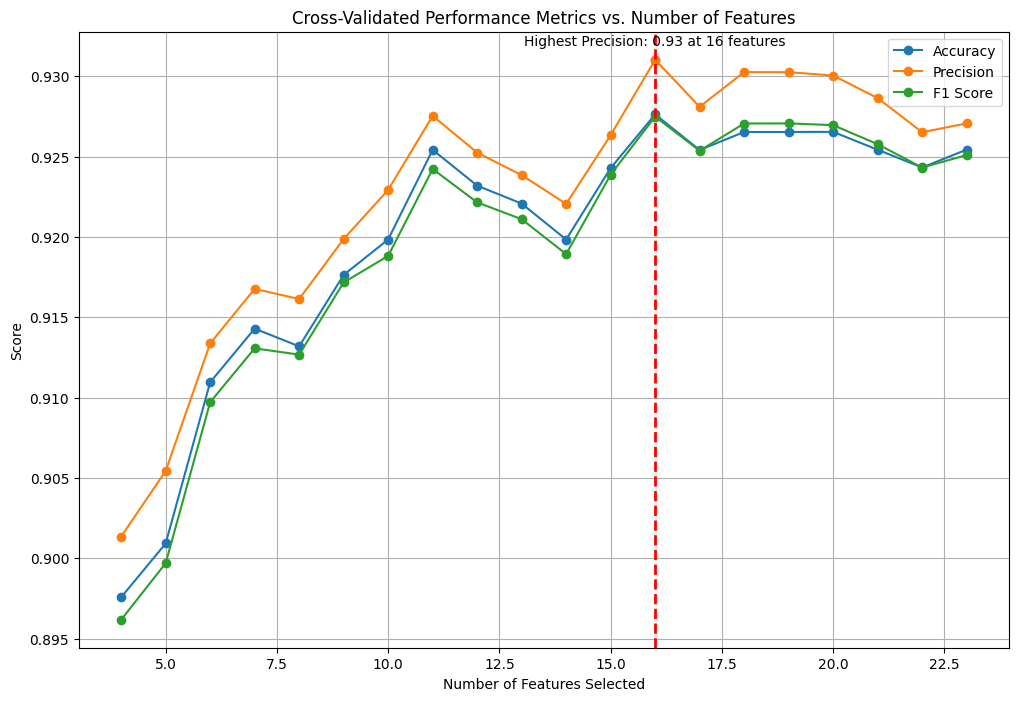

In [ ]:
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Load your data and separate into X (features) and y (target)
X = df.drop('Class', axis=1)
y = df['Class']

# Prepare cross-validation (use StratifiedKFold for classification tasks)
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Lists to store metrics
accuracies = []
precisions = []
f1_scores = []
feature_counts = range(4,24)  # TODO: Define the range of feature counts to be selected

for n in feature_counts:
    # Feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)     # TODO: Apply scaling to the feature set

    # Feature selection
    selector = RFE(SVC(kernel='linear', random_state=42), n_features_to_select=n, step=1)   # TODO: Specify the number of features to select
    X_selected = selector.fit_transform(X_scaled, y)    # TODO: Fit and transform the data with the selector

    # SVM classifier
    svm = SVC(kernel='linear', random_state=10)   # TODO: Initialize the SVM model with appropriate parameters

    # Evaluate using cross-validation
    accuracy_scores = []
    precision_scores = []
    f1_scores_list = []
    for train_index, test_index in cv.split(X_selected, y):
        X_train_cv, X_test_cv = X_selected[train_index], X_selected[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        svm.fit(X_train_cv, y_train_cv)    # TODO: Fit the SVM model on the training data
        y_pred = svm.predict(X_test_cv)   # TODO: Make predictions on the test data

        accuracy_scores.append(accuracy_score(y_test_cv, y_pred))    # TODO: Calculate the accuracy score
        precision_scores.append(precision_score(y_test_cv, y_pred, average='weighted'))   # TODO: Calculate the precision score
        f1_scores_list.append(f1_score(y_test_cv, y_pred, average='weighted'))    # TODO: Calculate the F1 score

    accuracies.append(np.mean(accuracy_scores))
    precisions.append(np.mean(precision_scores))
    f1_scores.append(np.mean(f1_scores_list))

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(feature_counts, accuracies, label='Accuracy', marker='o')
plt.plot(feature_counts, precisions, label='Precision', marker='o')
plt.plot(feature_counts, f1_scores, label='F1 Score', marker='o')

# Highlight the point with highest precision
max_precision_index = np.argmax(precisions)
max_precision_feature_count = feature_counts[max_precision_index]
plt.scatter(max_precision_feature_count, precisions[max_precision_index], color='red')
plt.axvline(x=max_precision_feature_count, color='r', linestyle='--', lw=2)
plt.annotate(f'Highest Precision: {precisions[max_precision_index]:.2f} at {max_precision_feature_count} features',
             (max_precision_feature_count, precisions[max_precision_index]),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Number of Features Selected')
plt.ylabel('Score')
plt.title('Cross-Validated Performance Metrics vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()

This question demonstrates the importance of feature selection in machine learning and shows how different numbers of features can affect a model’s precision.

It highlights the trade-off between model complexity and performance, helping students understand how to tune models for optimal results.



---

### Optimal Degree for Polynomial

#### Context:
Support Vector Machines (SVM) with a polynomial kernel are useful for non-linear data classification. The degree of the polynomial kernel plays a critical role in the model's ability to capture complex patterns in the data. This exercise involves determining the optimal polynomial degree for maximum precision in an SVM model.

#### Task:
Evaluate the performance of an SVM with a polynomial kernel at various degrees and identify the degree that results in the highest precision.

#### Instructions:
1. **Data Preparation:**
   - Assume `X_train_scaled` and `y_train` are your scaled feature set and target variable, respectively, prepared for training.

2. **Model Configuration and Evaluation:**
   - Set up a polynomial kernel SVM for degrees [2, 3, 4, 5].
   - Use cross-validation to evaluate the accuracy, precision, and F1 score for each degree.
   - Collect and plot these metrics to visualize how they vary with the polynomial degree.

3. **Analysis:**
   - Identify which polynomial degree achieves the highest precision score.

#### Question:
Based on the cross-validated performance metrics, which degree of the polynomial kernel results in the highest precision?

#### Options:
(A) Degree 2  
(B) Degree 3  
(C) Degree 4  
(D) Degree 5  


#### Learning Point:
This exercise highlights the impact of hyperparameter tuning on the effectiveness of machine learning algorithms, particularly how the degree of the polynomial kernel influences the precision of classifications in SVM. This helps students in practical settings where choosing the right model configuration is crucial for achieving the best results.

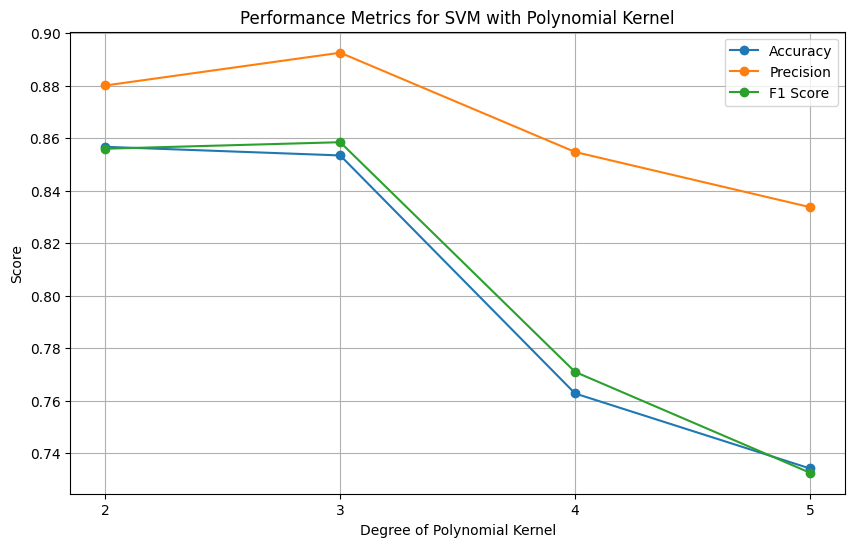

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Prepare cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Testing different degrees of the polynomial kernel
degrees = [2, 3, 4, 5]
accuracies = []
precisions = []
f1_scores = []

for degree in degrees:
    svm_poly = SVC(kernel='poly', degree=degree, gamma='scale', random_state=10)  # TODO: Specify the kernel type and degree parameter

    # Cross-validate the model
    accuracy = cross_val_score(svm_poly, X_train_scaled, y_train, cv=cv, scoring='accuracy').mean()  # TODO: Use the appropriate cross-validation function to get the mean accuracy
    precision = cross_val_score(svm_poly, X_train_scaled, y_train, cv=cv, scoring='precision_weighted').mean()  # TODO: Provide the feature set and call the appropriate method to get the mean precision
    f1 = cross_val_score(svm_poly, X_train_scaled, y_train, cv=cv, scoring='f1_weighted').mean()  # TODO: Specify the appropriate parameters for cross-validation

    # Store results for plotting
    accuracies.append(accuracy)
    precisions.append(precision)
    f1_scores.append(f1)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, accuracies, label='Accuracy', marker='o')
plt.plot(degrees, precisions, label='Precision', marker='o')
plt.plot(degrees, f1_scores, label='F1 Score', marker='o')
plt.xlabel('Degree of Polynomial Kernel')
plt.ylabel('Score')
plt.title('Performance Metrics for SVM with Polynomial Kernel')
plt.xticks(degrees)  # Set x-ticks to be the degrees for better readability
plt.legend()
plt.grid(True)
plt.show()

This exercise highlights the impact of hyperparameter tuning on the effectiveness of machine learning algorithms, particularly how the degree of the polynomial kernel influences the precision of classifications in SVM.

This helps students in practical settings where choosing the right model configuration is crucial for achieving the best results.



---

### Determining Optimal Gamma for SVM with RBF Kernel

#### Context:
In Support Vector Machines (SVM) using the radial basis function (RBF) kernel, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'. Adjusting gamma can significantly affect the model's ability to generalize.

#### Task:
Identify the optimal gamma value for an SVM model using the RBF kernel that results in the highest precision. Gamma values are tested on a logarithmic scale from \($10^{-4}$\) to \($10^1$\).

#### Instructions:
1. **Setup and Data Preparation:**
   - Use `StratifiedKFold` for cross-validation with 5 splits, shuffled data, and a set random state for reproducibility.
   - Standardize the features to improve model performance.
   - Prepare a range of gamma values on a logarithmic scale for testing.

2. **Model Training and Evaluation:**
   - Train an SVM model with the RBF kernel at various gamma settings.
   - Use cross-validation to evaluate accuracy, precision, and F1 score for each gamma value.
   - Record these scores for analysis.

3. **Analysis and Visualization:**
   - Plot accuracy, precision, and F1 score against gamma values.
   - Highlight the gamma value that results in the highest precision.
   - Use logarithmic scaling for the gamma axis to enhance visualization.



#### Question:
Based on the evaluation, in which range does the optimal gamma value for achieving the highest precision fall?

#### Options:
(A) \($10^{-4}$\) to \($10^{-3}$\)  
(B) \($10^{-3}$\) to \($10^{-2}$\)  
(C) \($10^{-2}$\) to \($10^{-1}$\)  
(D) \($10^{0}$\) to \($10^{1}$\)


#### Learning Point:
This question teaches the importance of tuning hyperparameters in kernel-based models like SVMs, demonstrating how gamma impacts the model's ability to generalize from the training data to unseen data. This knowledge is crucial for effectively applying SVMs to real-world classification problems.


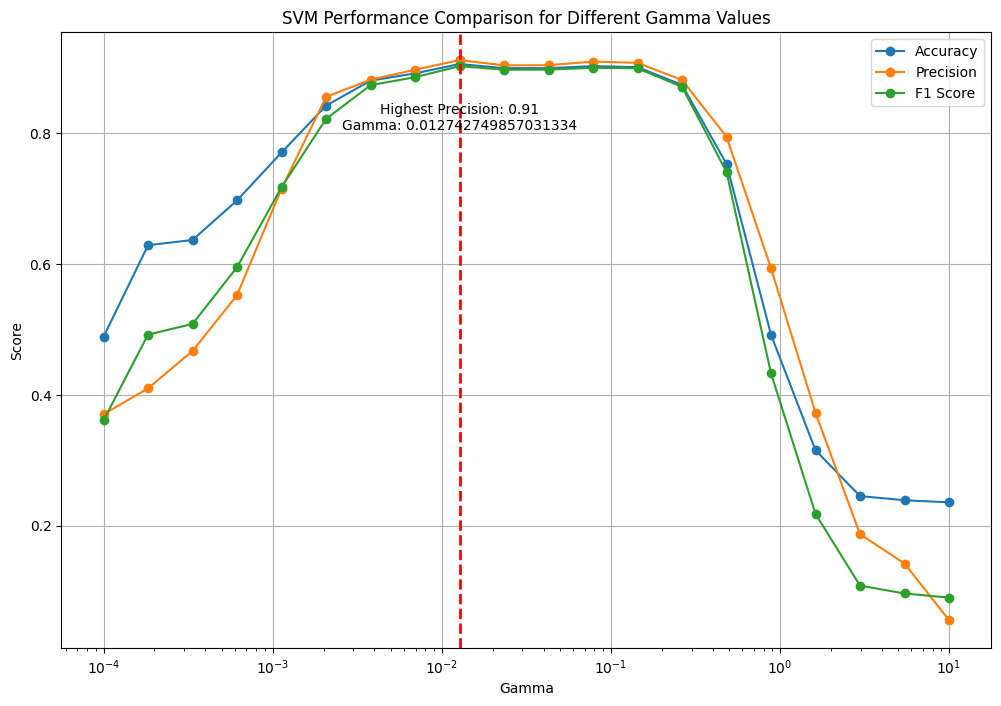

In [ ]:
# Prepare cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Testing a new range of gamma values with more granularity
gamma_values = np.logspace(-4, 1, 20)  # Logarithmic scale from 10^-4 to 10^1
accuracies = []
precisions = []
f1_scores = []

for gamma in gamma_values:
    svm_rbf = SVC(kernel='rbf', gamma=gamma, random_state=10)  # TODO: Specify the correct kernel and parameter name for gamma

    # Cross-validate the model
    accuracy = np.mean(cross_val_score(svm_rbf, X_train_scaled, y_train, cv=cv, scoring='accuracy'))  # TODO: Use cross-validation to compute the mean accuracy
    precision = np.mean(cross_val_score(svm_rbf, X_train_scaled, y_train, cv=cv, scoring='precision_weighted'))  # TODO: Provide the feature set and compute the mean precision
    f1 = np.mean(cross_val_score(svm_rbf, X_train_scaled, y_train, cv=cv, scoring='f1_weighted'))  # TODO: Compute the mean F1 score using cross-validation

    # Store the scores
    accuracies.append(accuracy)
    precisions.append(precision)
    f1_scores.append(f1)

# Find the index and value of the highest precision
max_precision_index = np.argmax(precisions)  # TODO: Find the index of the maximum precision
max_precision_value = precisions[max_precision_index]
max_precision_gamma = gamma_values[max_precision_index]

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(gamma_values, accuracies, label='Accuracy', marker='o')
plt.plot(gamma_values, precisions, label='Precision', marker='o')
plt.plot(gamma_values, f1_scores, label='F1 Score', marker='o')

# Highlighting the point with highest precision
plt.scatter(max_precision_gamma, max_precision_value, color='red')  # Highlight the point
plt.axvline(x=max_precision_gamma, color='r', linestyle='--', lw=2)  # Vertical line
plt.annotate(f'Highest Precision: {max_precision_value:.2f}\nGamma: {max_precision_gamma}',
             (max_precision_gamma, max_precision_value),
             textcoords="offset points", xytext=(0, -50), ha='center')

plt.xlabel('Gamma')
plt.ylabel('Score')
plt.title('SVM Performance Comparison for Different Gamma Values')
plt.xscale('log')  # Using logarithmic scale for gamma values
plt.legend()
plt.grid(True)
plt.show()

This question teaches the importance of tuning hyperparameters in kernel-based models like SVMs, demonstrating how gamma impacts the model’s ability to generalize from the training data to unseen data.

This knowledge is crucial for effectively applying SVMs to real-world classification problems.



---

### Optimal Regularization Parameter (C)

#### Context:
The regularization parameter \( C \) in Support Vector Machines (SVM) controls the trade-off between achieving a low error on the training data and minimizing the model complexity for better generalization. Determining the optimal \( C \) value is crucial for model performance, especially when using SVM for classification tasks.

#### Task:
Use Recursive Feature Elimination (RFE) to select the top 16 features for training an SVM classifier. Then, determine the optimal \( C \) value from a range of possible values to maximize the precision of the classifier.

#### Instructions:
1. **Feature Selection:**
   - Use RFE with SVM to reduce the number of features to the top 16 most significant features.
   - Standardize the features before applying RFE.
   
2. **Model Training and Validation:**
   - Train an SVM model with a linear kernel using the selected features.
   - Explore a range of \( C \) values using logarithmic scaling to determine the best \( C \) for maximizing precision.
   - Employ cross-validation using `StratifiedKFold` with 5 splits to evaluate model performance metrics such as accuracy, precision, and F1 score.

3. **Performance Analysis:**
   - Plot the performance metrics across different \( C \) values.
   - Identify and highlight the \( C \) value that results in the highest precision.

#### Question:
Based on the evaluation, in which range does the optimal \( C \) value for achieving the highest precision fall?

#### Options:
(A) 0 to 1  
(B) 1 to 3  
(C) 3 to 6  
(D) 6 to 10  

#### Learning Point:
This question demonstrates the importance of regularization in SVMs and helps students understand how the choice of \( C \) affects the model's ability to generalize. This knowledge is crucial for tuning models effectively, especially in scenarios prone to overfitting or underfitting.


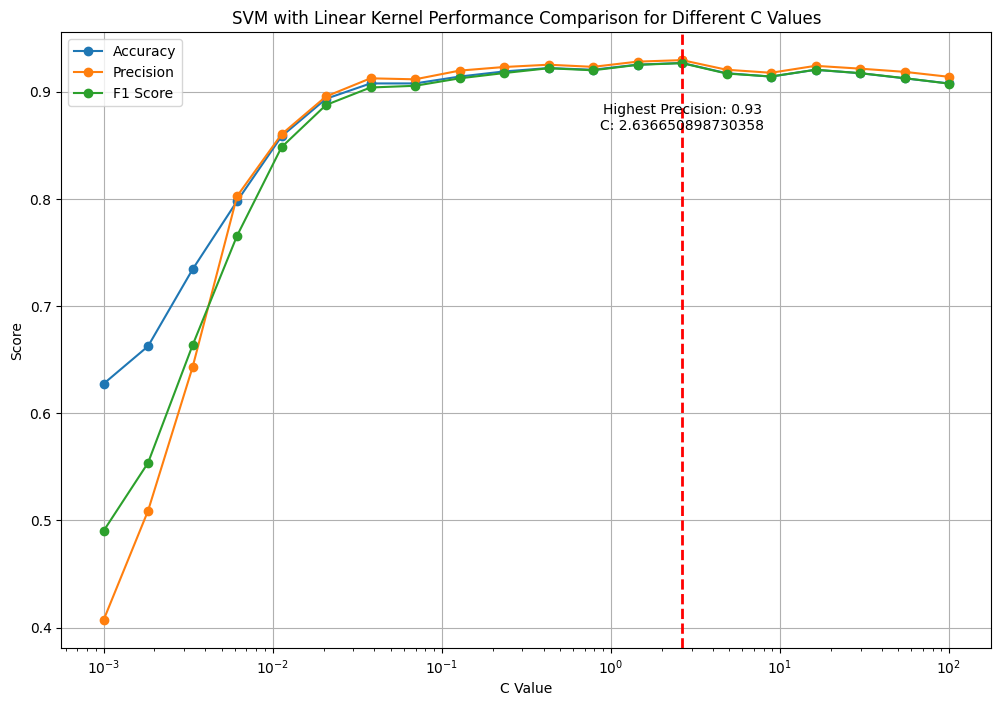

In [ ]:
# Set up the RFE with SVM as the estimator and select the top 16 features
selector = RFE(SVC(kernel='linear', random_state=42), n_features_to_select=16, step=1)  # TODO: Specify the correct parameter names
X_train_rfe = selector.fit_transform(X_train_scaled, y_train)  # TODO: Fit and transform the training data with RFE
X_test_rfe = selector.transform(X_test_scaled)  # TODO: Transform the test data with RFE

# Prepare cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Testing different C values
c_values = np.logspace(-3, 2, 20)  # Explore a range of C values on a log scale
accuracies = []
precisions = []
f1_scores = []

for c in c_values:
    svm_linear = SVC(kernel='linear', C=c, random_state=42)  # TODO: Initialize the SVC model with a linear kernel and the C parameter

    # Cross-validate the model using only the selected features by RFE
    accuracy = np.mean(cross_val_score(svm_linear, X_train_rfe, y_train, cv=cv, scoring='accuracy'))  # TODO: Use cross_val_score to compute the mean accuracy
    precision = np.mean(cross_val_score(svm_linear, X_train_rfe, y_train, cv=cv, scoring='precision_weighted'))  # TODO: Compute the mean precision
    f1 = np.mean(cross_val_score(svm_linear, X_train_rfe, y_train, cv=cv, scoring='f1_weighted'))  # TODO: Compute the mean F1 score

    # Store the scores
    accuracies.append(accuracy)
    precisions.append(precision)
    f1_scores.append(f1)

# Find the index and value of the highest precision
max_precision_index = np.argmax(precisions)  # TODO: Find the index of the maximum precision
max_precision_value = precisions[max_precision_index]
max_precision_c = c_values[max_precision_index]

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(c_values, accuracies, label='Accuracy', marker='o')
plt.plot(c_values, precisions, label='Precision', marker='o')
plt.plot(c_values, f1_scores, label='F1 Score', marker='o')

# Highlighting the point with highest precision
plt.scatter(max_precision_c, max_precision_value, color='red')  # Highlight the point
plt.axvline(x=max_precision_c, color='r', linestyle='--', lw=2)  # Vertical line
plt.annotate(f'Highest Precision: {max_precision_value:.2f}\nC: {max_precision_c}',
             (max_precision_c, max_precision_value),
             textcoords="offset points", xytext=(0, -50), ha='center')

plt.xlabel('C Value')
plt.ylabel('Score')
plt.title('SVM with Linear Kernel Performance Comparison for Different C Values')
plt.xscale('log')  # Using logarithmic scale for C values
plt.legend()
plt.grid(True)
plt.show()

This question demonstrates the importance of regularization in SVMs and helps students understand how the choice of ( C ) affects the model’s ability to generalize.

This knowledge is crucial for tuning models effectively, especially in scenarios prone to overfitting or underfitting.



---
### Counting Support Vectors in SVM

#### Context:
Support Vector Machine (SVM) is a robust classification technique that constructs a hyperplane or set of hyperplanes in a high-dimensional space, which can be used for classification, regression, or other tasks. A critical component of the SVM classifier is the support vectors, which are the data points nearest to the hyperplane and influence its position and orientation.

#### Task:
Use t-Distributed Stochastic Neighbor Embedding (t-SNE) for dimensionality reduction followed by SVM to classify data. Determine the total number of support vectors involved in classifying the data.

#### Instructions:
1. **Data Preparation and Preprocessing:**
   - Filter the dataset for two specific classes for simplification.
   - Apply standard scaling to the features to normalize data, enhancing the SVM's performance.

2. **Dimensionality Reduction:**
   - Implement t-SNE to reduce feature dimensions to two components, which aids in visualizing the dataset.

3. **SVM Training:**
   - Train an SVM classifier using the t-SNE output. Set the kernel to linear and regularization parameter \( C \) to 1.0.
   - Identify the support vectors from the trained model.

4. **Visualization:**
   - Plot the decision boundaries and highlight the support vectors.
   - Use contours to depict decision boundaries and margins.

5. **Analysis:**
   - Report the total number of support vectors found.


#### Question:
After training the SVM model on t-SNE reduced features, how many support vectors are found?

#### Options:
(A) 10  
(B) 15  
(C) 4  
(D) 20  

#### Learning Point:
This question helps students visualize complex machine learning concepts like SVM decision boundaries and the role of support vectors in high-dimensional space, providing insight into the mechanics of SVM classifiers and the effectiveness of dimensionality reduction techniques like t-SNE.



---------------------------------------------------------------
Total Number of Support Vectors found are 15
---------------------------------------------------------------


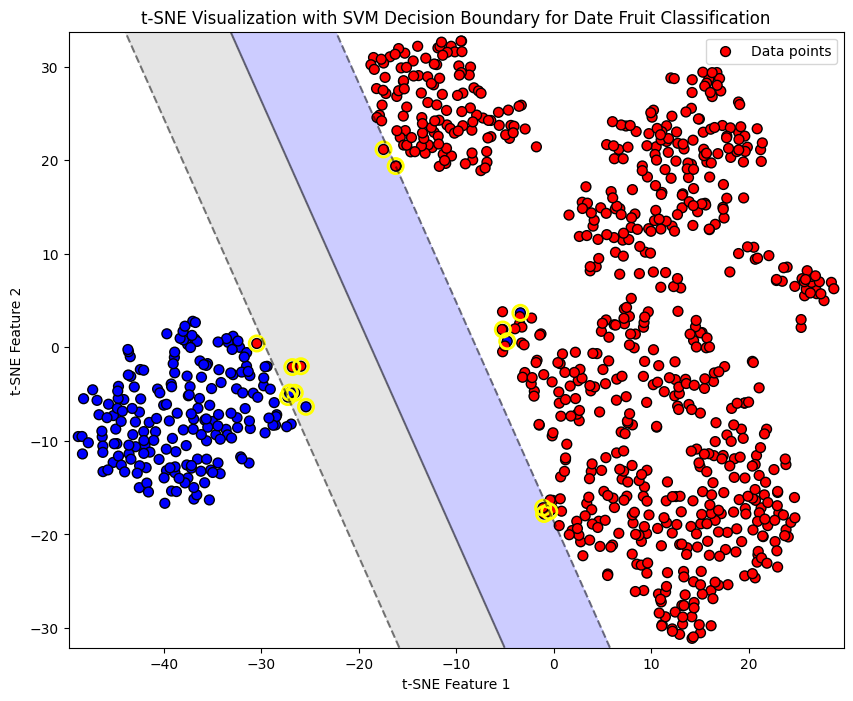

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# List of features
features = ['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']

# Create a copy of the DataFrame
df_temp = df.copy()

# Select features and filter for two classes
df_temp['Class'] = df_temp['Class'].apply(lambda x: 'SAFAVI' if x == 'SAFAVI' else 'Other')

# Encoding classes
df_temp['Label'] = df_temp['Class'].replace({'SAFAVI': 1, 'Other': 0})  # TODO: Use the appropriate method to map class labels to numerical values

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_temp[features])

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# SVM training
svm = SVC(kernel='linear', C=1.0)  # TODO: Initialize the SVC model with the correct parameters
svm.fit(X_tsne, df_temp['Label'])

# Support vectors
# Visit https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html to get the correct attribute for support vectors
support_vectors = svm.support_vectors_

print(f'---------------------------------------------------------------')
print(f'Total Number of Support Vectors found are {len(support_vectors)}')
print(f'---------------------------------------------------------------')

# Create grid to plot decision boundaries
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Plot decision boundary and margins
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])  # TODO: Use the decision function to predict decision boundaries
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))  # Define plot size here to ensure it encompasses all the elements
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'grey', 'red'])  # Background color for decision areas
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])  # Decision boundaries and margins

# Plot data points and support vectors
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_temp['Label'], cmap=ListedColormap(['#FF0000', '#0000FF']), s=50, edgecolors='k')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=120, facecolors='none', edgecolors='yellow', linewidths=2, label='Support vectors')

# Labels and title
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE Visualization with SVM Decision Boundary for Date Fruit Classification')
plt.legend(handles=[scatter], labels=['Data points'], loc='upper right')

plt.show()

This question helps students visualize complex machine learning concepts like SVM decision boundaries and the role of support vectors in high-dimensional space, providing insight into the mechanics of SVM classifiers and the effectiveness of dimensionality reduction techniques like t-SNE.



---

### Implement Hinge Loss from Scratch

#### Context:
Support Vector Machines (SVMs) rely on the hinge loss function to penalize misclassified points and those that are too close to the decision boundary. Understanding hinge loss helps explain how SVMs work.

#### Task:
Write a function to compute hinge loss for a simple binary classification dataset and use it to determine the loss of a sample classifier.

#### Instructions:
1. **Define Hinge Loss Function**: Implement a Python function to compute hinge loss using the following steps:
   - **Step 1**: Calculate the margin for each data point: \( $\text{margin} = y_i (\mathbf{w} \cdot \mathbf{x}_i + b))$.
   - **Step 2**: Compute the hinge loss for each data point: \( $\max(0, 1 - \text{margin}) \$).
   - **Step 3**: Return the average hinge loss across all data points.
2. **Evaluate Sample Classifier**: Use your function to compute the hinge loss for a classifier defined by weights and bias.
3. **Answer the Question**: Based on the computed loss, answer the following question about the nature of hinge loss and its implications.

#### Question:
What does the computed hinge loss value indicate about the classifier's performance?

**Statements**:
1. The hinge loss value \( > 1 \) indicates that most points are misclassified or too close to the decision boundary.
2. The hinge loss value \( < 1 \) suggests that most points are classified correctly but may still be close to the decision boundary.
3. The hinge loss value \( = 0 \) indicates that all points are classified correctly and far from the decision boundary.
4. The hinge loss value \( = 1 \) suggests that all points are classified correctly.

**Options**:

A) Statement 1  
B) Statement 2  
C) Statement 3  
D) Statement 4  





In [ ]:
# Sample Data (Binary classification)
X = np.array([[2, 3], [3, 4], [1, 1], [4, 5], [6, 7]])
y = np.array([1, 1, -1, 1, -1])

data = pd.DataFrame(X, columns = ['f1', 'f2'])
data['y'] = y

data.head()

,f1,f2,y
0,2,3,1
1,3,4,1
2,1,1,-1
3,4,5,1
4,6,7,-1


In [ ]:
import numpy as np

# Hinge Loss Implementation
def hinge_loss(X, y, weights, bias):
    """
    Compute hinge loss for a simple SVM model.
    Args:
        X (ndarray): Feature matrix.
        y (ndarray): Target vector.
        weights (ndarray): Weight vector.
        bias (float): Bias term.
    Returns:
        float: Hinge loss value.
    """
    margins = y * (np.dot(X, weights) + bias)  # TODO: Calculate the margins using a dot product of weights and features, and add the bias
    hinge_loss = np.maximum(0, 1 - margins)  # TODO: Apply the hinge loss formula: max(0, 1 - margin)
    return np.mean(hinge_loss)  # TODO: Return the mean or sum of the hinge loss values

# Example weights and bias
weights = np.array([0.5, 0.5])
bias = 0.0

# Compute Hinge Loss
loss = hinge_loss(X, y, weights, bias)
print(f'Hinge Loss: {loss:.4f}')

Hinge Loss: 1.9000
